### Разбиваем на 10 кластеров, считаем вероятность ошибки, выводим матрицу (Задачи 1-3)
#### Остальные задачи будут ниже

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [3]:
from scipy.cluster.vq import kmeans

In [4]:
def get_labels(obs, centroids):
    obs_exp = np.expand_dims(obs, axis=1)
    distance = np.linalg.norm(obs_exp - centroids.reshape(centroids.shape[0],64), axis=2)
    labels = distance.argmin(axis=1)
    return labels

In [5]:
def digit_clusters(M):
    centroids = kmeans(digits.images.reshape(1797, 64), M)[0].reshape(M,8,8)
    labels = get_labels(digits.images.reshape(1797,64), centroids)
    centroid_labels = np.arange(M)
    for i in range(M): 
        mask = labels == i
        centroid_labels[i] = np.bincount(digits.target[mask]).argmax()   
        #centroid_labels[labels] - массив предсказанных значений i-му элементу(наблюдению)
    return centroids, centroid_labels, labels

In [6]:
centroids, centroid_labels, labels = digit_clusters(10)

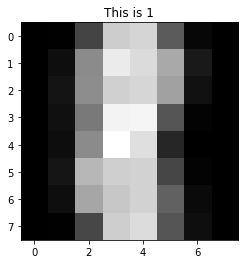

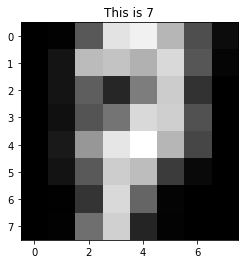

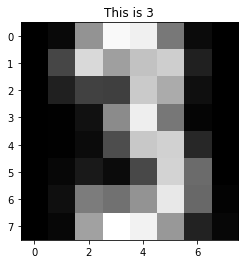

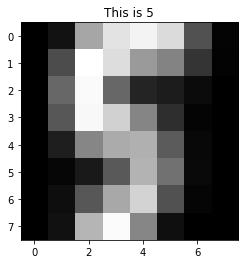

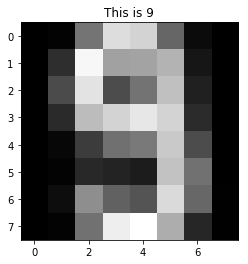

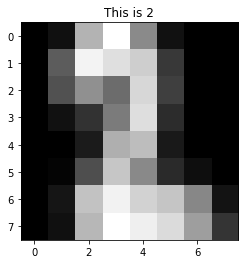

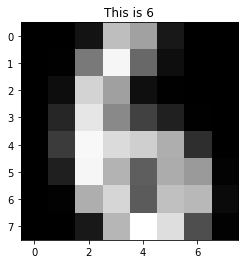

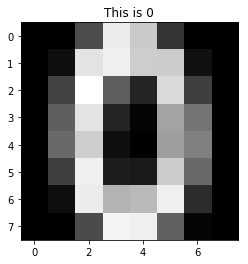

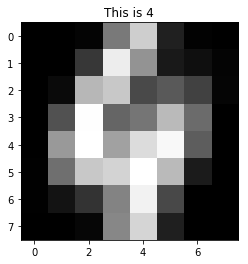

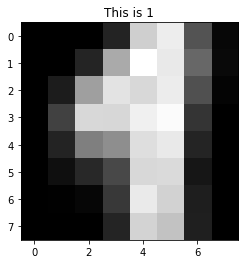

In [7]:
for i in range(10):
    plt.imshow(centroids[i], cmap='gray')
    plt.title('This is {}'.format(centroid_labels[i]))
    plt.show()

In [8]:
def error_rate(centroid_labels, labels, obs_tar):
    return (centroid_labels[labels] != obs_tar).mean()

In [9]:
error_rate(centroid_labels, labels, digits.target)

0.21535893155258765

### Confusion matrix при k=10 (3 задача)

In [10]:
def confusion_matrix(centroid_labels, labels, obs_tar):
    q = 10
    confusion_matrix = np.zeros(q*q).reshape(q,q)
    for i in range(q):
        for l in range(q):
            mask = centroid_labels[labels] == i
            mask = obs_tar[mask] == l
            confusion_matrix[i,l] = mask.astype(int).sum()
    return confusion_matrix

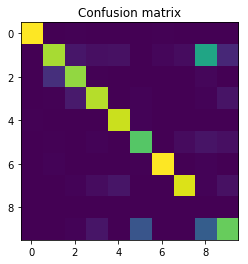

In [11]:
confuse_matrix = confusion_matrix(centroid_labels, labels, digits.target)
plt.imshow(confuse_matrix, cmap='viridis')
plt.title('Confusion matrix')
plt.show()

### Рисуем график вероятности ошибки (4 задача) 

In [12]:
N = 50
error_k = np.ones(N)
for k in range(1,N):
    centroids, centroid_labels, labels = digit_clusters(k)
    error_k[k] = error_rate(centroid_labels, labels, digits.target)

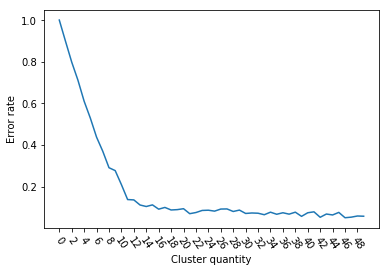

In [13]:
plt.plot(range(N),error_k)
plt.xlabel('Cluster quantity')
plt.ylabel('Error rate')
plt.xticks(range(N)[::2],rotation=305)
plt.show()

In [14]:
#Выбираю 12 - т.к 1) при повышении кол-ва кластеров сильно не выиграем в проценте ошибок
#                 2) мне не нужна очень тонкая кластеризация, нужны основные цифры + разновидности нескольких

### Смотрим результаты при оптимальном (в моём понимании) k=~16(Задача 5)

In [15]:
centroids, centroid_labels, labels = digit_clusters(16)

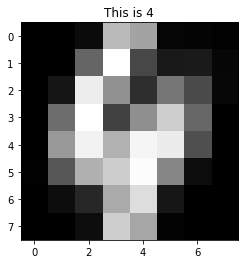

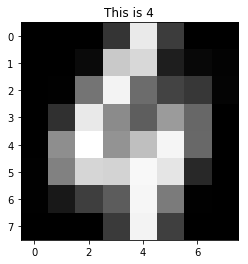

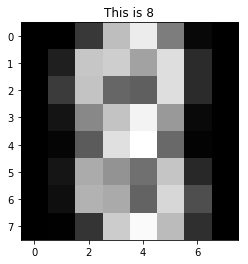

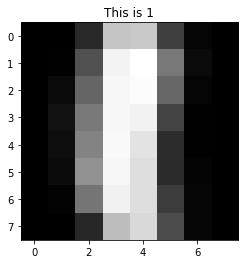

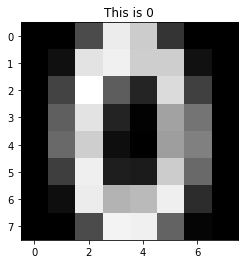

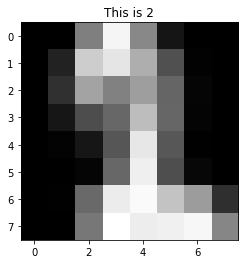

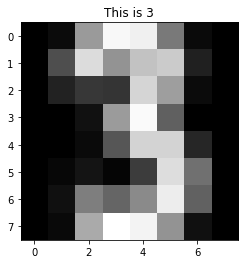

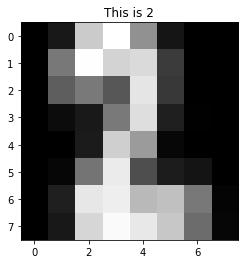

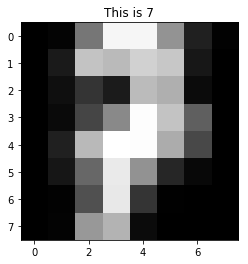

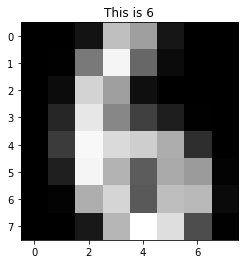

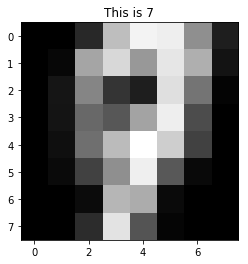

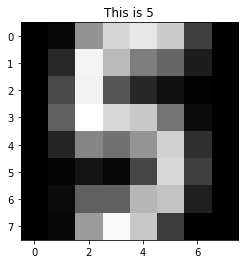

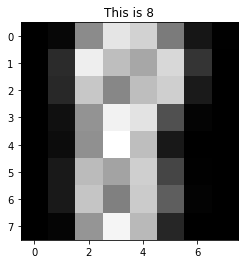

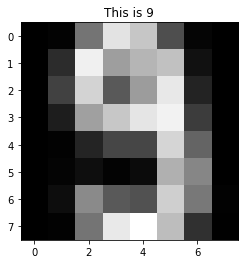

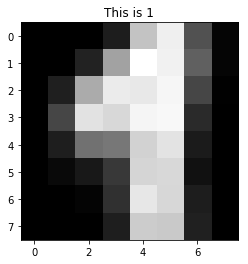

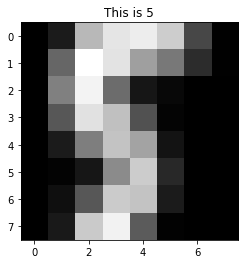

In [16]:
for i in range(16):
    plt.imshow(centroids[i], cmap='gray')
    plt.title('This is {}'.format(centroid_labels[i]))
    plt.show()

In [17]:
#Ответ на вопрос: For which digits there is more than one cluster? For which digits there is exactly one cluster?
np.bincount(centroid_labels)

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 1], dtype=int64)

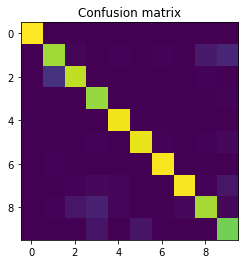

In [18]:
confuse_matrix = confusion_matrix(centroid_labels, labels, digits.target)
plt.imshow(confuse_matrix, cmap='viridis')
plt.title('Confusion matrix')
plt.show() 

##### Оказалось, что немного увеличив кол-во кластеров, можно добиться более точного распознавания. Одна из причин - разные варианты написания одной цифры.